## Q1. 1) Implement 1D Fast Fourier Transform (Recursive Formulation). 

In [1]:
# Q1.1
import numpy as np

def fft(x):
    N = x.shape[0]
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    T= [np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)]
    
    return np.array([even[k] + T[k] for k in range(N//2)] + [even[k] - T[k] for k in range(N//2)]) 

x = np.random.random(256)
fft_inbuilt=np.fft.fft(x)
fft_own= fft(x)

print('Comparison of FFT inbuilt and own (True/False): ',np.allclose(fft_own, fft_inbuilt))


Comparison of FFT inbuilt and own (True/False):  True


## Q1. 2) Use it to implement 2D FFT and display the result on suitable images of your choice

True


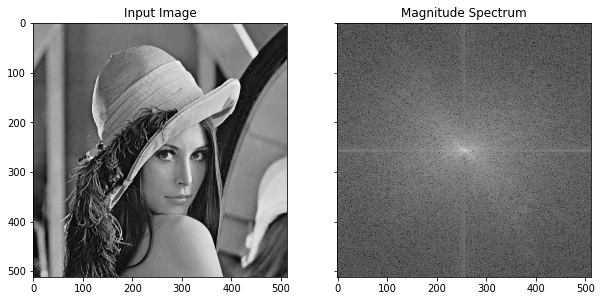

In [10]:
# Q1.2
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def fft(x):
    N=x.shape[0]
    if N <= 1: return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    T= [np.exp(-2j*np.pi*k/N)*odd[k] for k in range(N//2)]
    
    return np.array([even[k] + T[k] for k in range(N//2)] + [even[k] - T[k] for k in range(N//2)]) 


def fft2D(x):
    mat = x.T
    mat = [fft(mat[k]) for k in range(mat.shape[0])]
    mat = np.array(mat)
    mat = mat.T
    mat = [fft(mat[k]) for k in range(mat.shape[0])]
    return mat


img = cv.imread('input_data/lena.jpg',0)
p = fft2D(img)
p1 = np.fft.fft2(img)
print(np.allclose(p, p1))

fshift = np.fft.fftshift(p)
magnitude_spectrum = 20*np.log(np.abs(fshift))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
ax1.imshow(img, cmap = 'gray')
ax1.set_title('Input Image')

ax2.set_title('Magnitude Spectrum')
ax2.imshow(magnitude_spectrum, cmap = 'gray')


## Q2. 1)  Implement the Ideal, Butterworth and Gaussian Low Pass Filters and apply them on lena.jpg

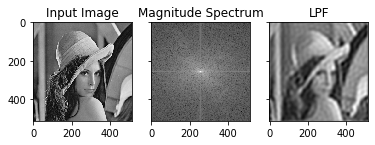

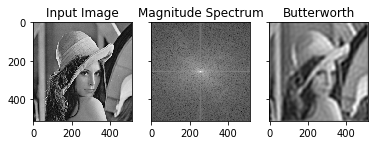

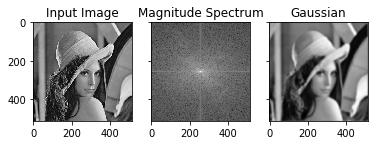

In [3]:
# Q2.1
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#LPF function
def LPF(img,do):
    # fft to convert the image to freq domain 
    f = np.fft.fft2(img)

    # shift to the center
    fshift = np.fft.fftshift(f)
    
    rows, cols = img.shape
    h =  np.zeros((rows,cols))
    d = np.zeros((rows,cols))
    for i in range (rows):
        for j in range(cols):
            d[i][j] = np.sqrt(np.power((i-rows/2),2) + np.power((j-cols/2),2))
            if(d[i][j]<= do):
                h[i][j]= 1
            else:
                h[i][j]=0

  
    #convovle(multiplication in frequency domain)
    gshift = fshift * h

    # shift back (we shifted the center before)
    f_ishift = np.fft.ifftshift(gshift)

    # inverse fft to get the image back 
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back) #remove negative
    
    f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True)
    ax1.set_title('Input Image')
    ax1.imshow(img, cmap = 'gray')

    ax2.set_title('Magnitude Spectrum')
    ax2.imshow(20*np.log(np.abs(fshift)), cmap = 'gray')
    
    ax3.set_title('LPF')
    ax3.imshow(img_back, cmap = 'gray')
    
#Butterworth function
def Butterworth(img,do,n):
    # fft to convert the image to freq domain 
    f = np.fft.fft2(img)

    # shift to the center
    fshift = np.fft.fftshift(f)
    
    rows, cols = img.shape
    h =  np.zeros((rows,cols))
    d = np.zeros((rows,cols))
    for i in range (rows):
        for j in range(cols):
            d[i][j] = np.sqrt(np.power((i-rows/2),2) + np.power((j-cols/2),2))
            h[i][j]= 1/(1+np.power((d[i][j]/do),2*n))

    #convovle(multiplication in frequency domain)
    gshift = fshift * h

    # shift back (we shifted the center before)
    f_ishift = np.fft.ifftshift(gshift)

    # inverse fft to get the image back 
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back) #remove negative
    
    f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True)
    ax1.set_title('Input Image')
    ax1.imshow(img, cmap = 'gray')

    ax2.set_title('Magnitude Spectrum')
    ax2.imshow(20*np.log(np.abs(fshift)), cmap = 'gray')
    
    ax3.set_title('Butterworth')
    ax3.imshow(img_back, cmap = 'gray')
    
#Gaussian function
def Gaussian(img,do):
    # fft to convert the image to freq domain 
    f = np.fft.fft2(img)

    # shift to the center
    fshift = np.fft.fftshift(f)
    
    rows, cols = img.shape
    h =  np.zeros((rows,cols))
    d = np.zeros((rows,cols))
    for i in range (rows):
        for j in range(cols):
            d[i][j] = np.sqrt(np.power((i-rows/2),2) + np.power((j-cols/2),2))
            h[i][j]= np.exp(-(np.power(d[i][j],2)/(2*np.power(do,2))))


    #convovle(multiplication in frequency domain)
    gshift = fshift * h

    # shift back (we shifted the center before)
    f_ishift = np.fft.ifftshift(gshift)

    # inverse fft to get the image back 
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back) #remove negative
    
    f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True)
    ax1.set_title('Input Image')
    ax1.imshow(img, cmap = 'gray')

    ax2.set_title('Magnitude Spectrum')
    ax2.imshow(20*np.log(np.abs(fshift)), cmap = 'gray')
    
    ax3.set_title('Gaussian')
    ax3.imshow(img_back, cmap = 'gray')

img = cv.imread('input_data/lena.jpg',0)
LPF(img,20) #do=distance
Butterworth(img,20,50)# butterworth(img,do,n) , as 'n' increases img becomes smooth to noisy
Gaussian(img,20)


## Q2. 2) Using lena.jpg, apply the Gaussian low pass ﬁlter with two diﬀerent values of σ. Compute the diﬀerence of the two outputs and display it. Report your observations

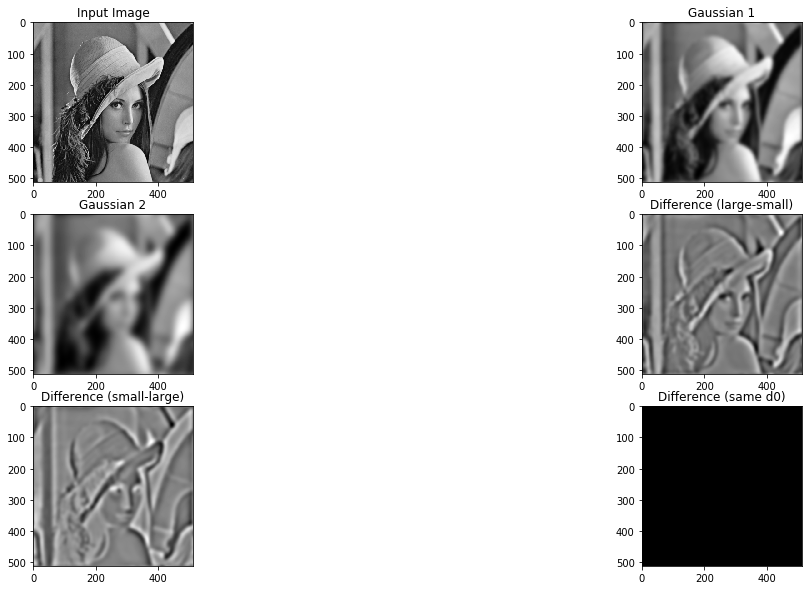

In [4]:
# Q2.2
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def Gaussian(img,do):
 
    rows, cols = img.shape
    h =  np.zeros((rows,cols))
    d = np.zeros((rows,cols))
    for i in range (rows):
        for j in range(cols):
            d[i][j] = np.sqrt(np.power((i-rows/2),2) + np.power((j-cols/2),2))
            h[i][j]= np.exp(-(np.power(d[i][j],2)/np.power(do,2)))


    #convovle(multiplication in frequency domain)
    gshift = fshift * h

    # shift back (we shifted the center before)
    f_ishift = np.fft.ifftshift(gshift)

    # inverse fft to get the image back 
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back) #remove negative
    return img_back
    

img = cv.imread('input_data/lena.jpg',0)
# fft to convert the image to freq domain 
f = np.fft.fft2(img)

# shift to the center
fshift = np.fft.fftshift(f)
img_back1=Gaussian(fshift,20)
img_back2=Gaussian(fshift,10)
final1 = img_back1-img_back2
final2 = img_back2-img_back1
final3 = img_back1 - img_back1

f, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(20,10))
#f.tight_layout()
ax1.set_title('Input Image')
ax1.imshow(img, cmap = 'gray')

ax2.set_title('Gaussian 1')
ax2.imshow(img_back1, cmap = 'gray')
    
ax3.set_title('Gaussian 2')
ax3.imshow(img_back2, cmap = 'gray')

ax4.set_title('Difference (large-small)')
ax4.imshow(final1, cmap = 'gray')

ax5.set_title('Difference (small-large)')
ax5.imshow(final2, cmap = 'gray')

ax6.set_title('Difference (same d0)')
ax6.imshow(final3, cmap = 'gray')

## Q3.  Say you are travelling in a bus for a city tour in Paris and you want to capture the scene outside. Thankfully the Bus is stationary. Unfortunately, you can’t open the window and the window acts as a semi-reﬂecting surface and the image contains reﬂections from inside the bus :( . But Hey, you got a camera which can focus on the outside scene by blurring the reﬂection oﬀ the window. This can be written as out1 = f1 + h2 * f2 where h2 is the blurring ﬁlter applied on f2. The second image is taken focusing the window surface, blurring the outside scene. This can be written as out2 = h1 * f1 + f2 where h1 is the blurring ﬁlter applied on f1. You are given the two images out1 and out2. Assuming you know h1 and h2, how would you ﬁnd f1 and f2. Do you see any issues with the formula derived?

In [1]:
%%html
<img src='input_data/q3.jpg'/>

## Q4.  Denoise the given image land.png and explain your process

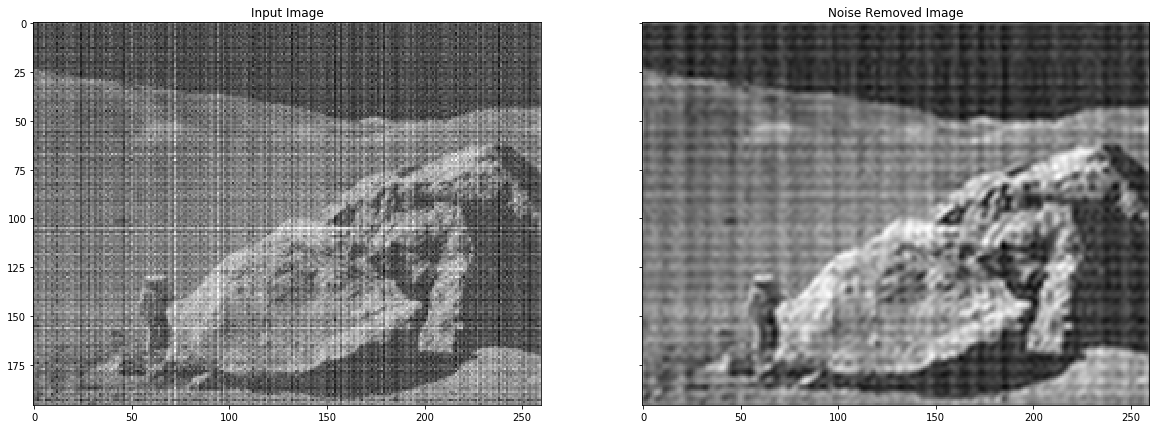

In [63]:
# Q4.
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('input_data/land.png',0)

def noise_remove(img,keep_fraction):
    
    row = img.shape[0]
    col = img.shape[1]
    fg = np.fft.fft2(img)
    fg[int(row*keep_fraction):int(row*(1-keep_fraction))] = 0
    fg[:, int(col*keep_fraction):int(col*(1-keep_fraction))] = 0
    fg = np.fft.ifft2(fg)
    return fg


fg = noise_remove(img,0.2)
f, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(20,20))
ax1.set_title('Input Image')
ax1.imshow(img, cmap = 'gray')

ax2.set_title('Noise Removed Image')
ax2.imshow(np.abs(fg), cmap = 'gray')


# Process for Denoising:

1.) Taking the input image (I)

2.) Performing 2D FFT on (I)

3.) Making the higher frequencies of FFT(I) as 0, basically removing the higher frequency from center to certain distance
and preserving the lower frequency values which are at corners (K)

4.) Performing 2D IFFT on (K)

5.) Display the denoised image


## Q5.)  Find the equivalent ﬁlter H(u,v) in the frequency domain for the following spacial ﬁlter and show results of applying this ﬁlter on an image of your choice (in the frequency domain): 

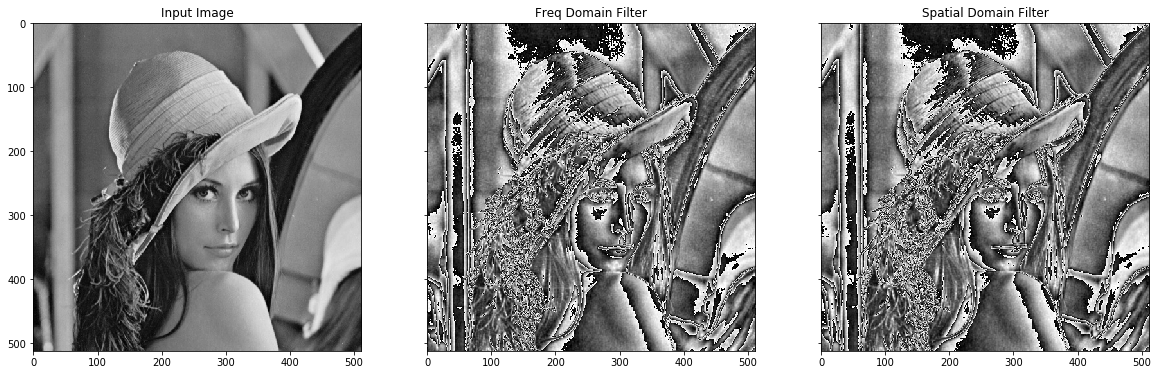

In [57]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


img = cv.imread('input_data/lena.jpg',0)

row=img.shape[0]
col=img.shape[1]
t_img = np.fft.fft2(img)
t_img = np.fft.fftshift(t_img, axes=None)
filterr=[[0,1,0],[1,2,1],[0,1,0]]
filterr=np.pad(filterr,((0,img.shape[1]-3),(0,img.shape[0]-3)),'constant')
t_filterr = np.fft.fft2(filterr)
t_filterr = np.fft.fftshift(t_filterr)
t_out=t_filterr*t_img
out=np.fft.ifftshift(out)
out=np.fft.ifft2(t_out)
out=np.abs(np.real(out))
out=out%256
out=out.astype(int)

kernel = np.array([[0,1,0],[1,2,1],[0,1,0]])
og = img / 255
og = cv.filter2D(og,-1,kernel)
# print(new)
og = og * 255
og = np.round(og)
og = og % 256

f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(20,10))
ax1.set_title('Input Image')
ax1.imshow(img, cmap = 'gray')

ax2.set_title('Freq Domain Filter')
ax2.imshow(out, cmap = 'gray')
    
ax3.set_title('Spatial Domain Filter')
ax3.imshow(og, cmap = 'gray')

## Q6. 1)  Pick images f and h of diﬀerent dimensions, each not necessarily square, and verify the convolution theorem (DFT[f ∗h] = FzHz, where Fz and Hz are the 2D-DFT of the images fz, hz, with fz,hz being the images f and h,with appropriate zero-padding)

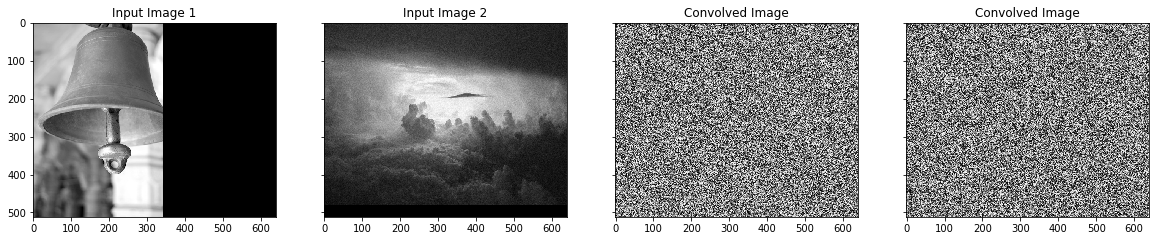

In [78]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import math

img1 = cv.imread('input_data/bell.jpg',0)
img2 = cv.imread('input_data/sky.png',0)
row1=img1.shape[0]
col1=img1.shape[1]
row2=img2.shape[0]
col2=img2.shape[1]
if (row1<=row2):
    p_img1 = np.pad(img1,((0,row2-row1),(0,0)),'constant')
else:
    p_img2 = np.pad(img2,((0,row1-row2),(0,0)),'constant')
if(col1<=col2):
    p_img1 = np.pad(img1,((0,0),(0,col2-col1)),'constant')
else:
    p_img2 = np.pad(img2,((0,0),(0,col1-col2)),'constant')
    
    
f = np.fft.fft2(p_img1)
f_shift = np.fft.fftshift(f)

h= np.fft.fft2(p_img2)
h_shift = np.fft.fftshift(h)

g_shift= f_shift*h_shift

g= np.fft.ifftshift(g_shift)
g= np.fft.ifft2(g)
g=np.abs(np.real(g))
g=g%256
g=g.astype(int)


og = p_img1 /255
og = cv.filter2D(og,-1,p_img2)
og = og * 255
og = np.round(og)
og = og % 256

f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, sharey=True, figsize=(20,10))
ax1.set_title('Input Image 1')
ax1.imshow(p_img1, cmap = 'gray')

ax2.set_title('Input Image 2')
ax2.imshow(p_img2, cmap = 'gray')
    
ax3.set_title('Convolved Image')
ax3.imshow(g, cmap = 'gray')

ax4.set_title('Convolved Image')
ax4.imshow(og, cmap = 'gray')

## Q6. 2)  In the above question, ﬁnd the time required to compute the convolution directly (using conv2) and using the DFT (ﬁnd Fe,He after zero-padding, multiply point-wise, and take inverse DFT). Use matlab functions (tic, toc, cputime) for calculating the time required for your operations. What are your observations for various diﬀerent dimensions of f,h 

Image 1 Size: (512, 343) , Image 2 Size (480, 640)
Time Taken in FFT Convolve(in secs): 0.12667369842529297
Time taken in Convolve(in secs): 0.3466198444366455
##########################################################################
Image 1 Size: (480, 640) , Image 2 Size (512, 512)
Time Taken in FFT Convolve(in secs): 0.15970420837402344
Time taken in Convolve(in secs): 0.31310057640075684


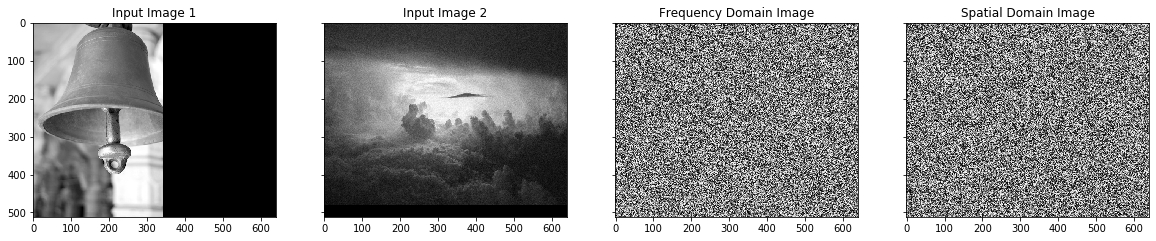

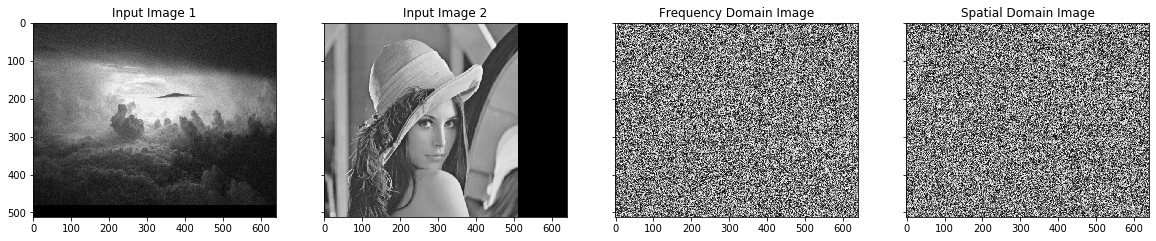

In [79]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import math
import time

def padding(img1,img2):
    row1=img1.shape[0]
    col1=img1.shape[1]
    row2=img2.shape[0]
    col2=img2.shape[1]
    if (row1<=row2):
        p_img1 = np.pad(img1,((0,row2-row1),(0,0)),'constant')
    else:
        p_img2 = np.pad(img2,((0,row1-row2),(0,0)),'constant')
    if(col1<=col2):
        p_img1 = np.pad(img1,((0,0),(0,col2-col1)),'constant')
    else:
        p_img2 = np.pad(img2,((0,0),(0,col1-col2)),'constant')
    return p_img1,p_img2
    
def FFT_Convovle(p_img1,p_img2): 
    start = time.time()
    f = np.fft.fft2(p_img1)
    f_shift = np.fft.fftshift(f)

    h= np.fft.fft2(p_img2)
    h_shift = np.fft.fftshift(h)

    g_shift= f_shift*h_shift

    g= np.fft.ifftshift(g_shift)
    g= np.fft.ifft2(g)
    g=np.abs(np.real(g))
    g=g%256
    g=g.astype(int)
    time_taken=time.time()-start
    return g,time_taken

def Convovle(p_img1,p_img2):
    start = time.time()
    og = p_img1 /255
    og = cv.filter2D(og,-1,p_img2)
    og = og * 255
    og = np.round(og)
    og = og % 256
    time_taken=time.time()-start
    return og,time_taken

def plotting(p_img1,p_img2,g,og,time_fft,time_c):
    f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, sharey=True, figsize=(20,10))
    ax1.set_title('Input Image 1')
    ax1.imshow(p_img1, cmap = 'gray')

    ax2.set_title('Input Image 2')
    ax2.imshow(p_img2, cmap = 'gray')
    
    ax3.set_title('Frequency Domain Image')
    ax3.imshow(g, cmap = 'gray')

    ax4.set_title('Spatial Domain Image')
    ax4.imshow(og, cmap = 'gray')
    
    print('Time Taken in FFT Convolve(in secs):',time_fft)
    print('Time taken in Convolve(in secs):',time_c)


img1 = cv.imread('input_data/bell.jpg',0)
img2 = cv.imread('input_data/sky.png',0)
p_img1,p_img2 = padding(img1,img2)
g,time_fft = FFT_Convovle(p_img1,p_img2)
og,time_c = Convovle(p_img1,p_img2)
print('Image 1 Size:',img1.shape,', Image 2 Size',img2.shape)
plotting(p_img1,p_img2,g,og,time_fft,time_c)

print('##########################################################################')
img1 = cv.imread('input_data/sky.png',0)
img2 = cv.imread('input_data/lena.jpg',0)
p_img3,p_img4 = padding(img1,img2)
g,time_fft = FFT_Convovle(p_img3,p_img4)
og,time_c = Convovle(p_img3,p_img4)
print('Image 1 Size:',img1.shape,', Image 2 Size',img2.shape)
plotting(p_img3,p_img4,g,og,time_fft,time_c)

## Q7. 1) Sample this image at diﬀerent spatial sampling frequencies nx,ny. Find the nyquist rate for the grayscale version of the image bricks.jpg. 

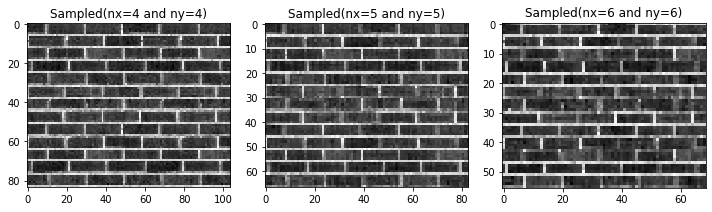

Nyquist freq =[ 66.6 , 82.6 ]


In [21]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def sampling(img,nx,ny):
    g = img[0::nx,0::ny]
    return g

img = cv.imread('input_data/bricks.jpg',0)
i=img
g0 = sampling(img,4,4)
g1 = sampling(img,5,5)
g2 = sampling(img,6,6)

plt.figure(figsize=(10,20))
plt.subplot(131),plt.title('Sampled(nx=4 and ny=4)')
plt.imshow(g0, cmap='gray')
plt.subplot(132),plt.title('Sampled(nx=5 and ny=5)')
plt.imshow(g1, cmap='gray')
plt.subplot(133),plt.title('Sampled(nx=6 and ny=6)')
plt.imshow(g2, cmap='gray')
plt.tight_layout()
plt.show()
print('Nyquist freq =[', img.shape[0]/5,",",img.shape[1]/5,']')

## Q7. 2)  Investigate the eﬀect of blurring the image on the nyquist rate. Show intermediate results wherever relevant.

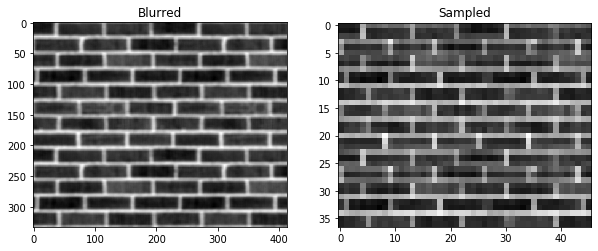

In [10]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

def sampling(img,nx,ny):
    g = img[0::nx,0::ny]
    return g

img = cv.imread('input_data/bricks.jpg',0)

g1 = cv.GaussianBlur(img,(7,7),cv.BORDER_DEFAULT)
g2 = sampling(g1,9,9)

plt.figure(figsize=(10,20))
plt.subplot(121),plt.title('Blurred')
plt.imshow(g1, cmap='gray')
plt.subplot(122),plt.title('Sampled')
plt.imshow(g2, cmap='gray')
plt.show()


#nyquist rate reduces when sampled on blur image, because blur image is basically is low pass filter which attenuates high freq, as I increase nyquist rate the image goes to aliasing

## Q8. 1)  Compute the FFT of the image rectangle.jpg. Now rotate the image in spatial domain and compute the FFT of the rotated image. Report your observations and justify it mathematically

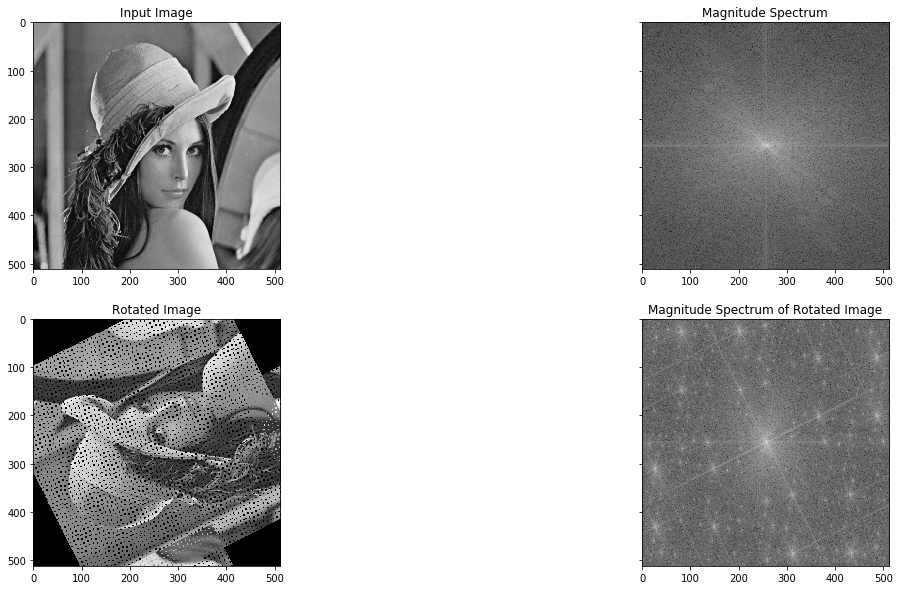

In [29]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import math

img = cv.imread('input_data/lena.jpg',0)

def rotation(img,theta):
    row=img.shape[0]
    col=img.shape[1]
    x_center=math.floor(row/2)
    y_center=math.floor(col/2)
    new_img=np.zeros((row,col))
    for i in range(row):
          for j in range(col):
            new_x = (math.cos(theta)*(i-x_center)) - (math.sin(theta)*(j-y_center)) + x_center
            new_y = (math.sin(theta)*(i-x_center)) + (math.cos(theta)*(j-y_center)) + y_center
            new_x=math.floor(new_x)
            new_y=math.floor(new_y)
            if(row > new_x) and (col > new_y):
                new_img[new_x][new_y] = img[i][j]
                
    return new_img

def fft2d(img):
    # fft to convert the image to freq domain 
    f = np.fft.fft2(img)

    # shift to the center
    fshift = np.fft.fftshift(f)
    return fshift


fshift= fft2d(img)
rotated_img= rotation(img,90)
rotated_shift = fft2d(rotated_img)
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharey=True, figsize=(20,10))
ax1.set_title('Input Image')
ax1.imshow(img, cmap = 'gray')

ax2.set_title('Magnitude Spectrum')
ax2.imshow(20*np.log(np.abs(fshift)), cmap = 'gray')
    
ax3.set_title('Rotated Image')
ax3.imshow(rotated_img, cmap = 'gray')

ax4.set_title('Magnitude Spectrum of Rotated Image')
ax4.imshow(20*np.log(np.abs(rotated_shift)), cmap = 'gray')


## Q8. 2) Take the image rectangle.jpg and translate the image by few pixels Find the FFT of original and translated images. Report your observations and justify it mathematically.

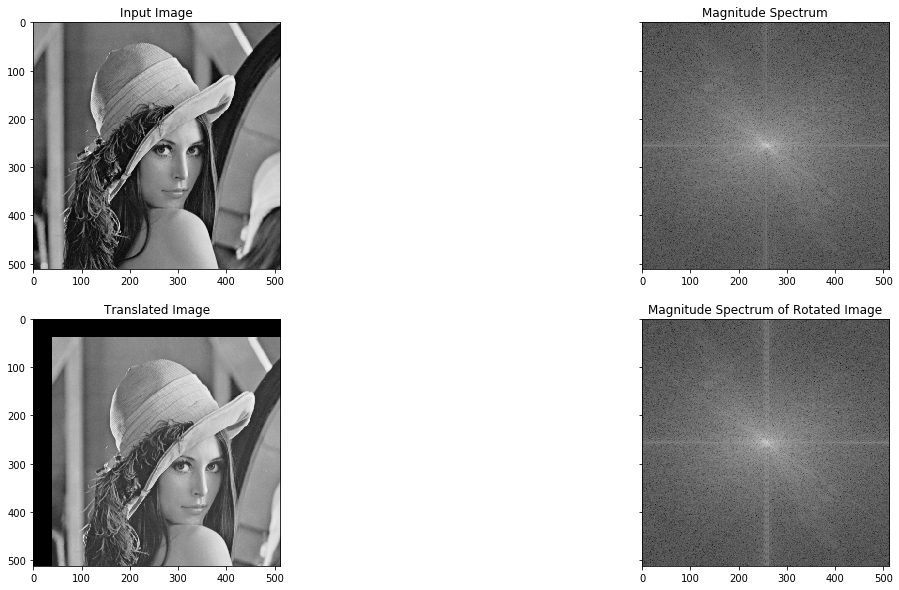

In [77]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import math

img = cv.imread('input_data/lena.jpg',0)

def translation(img,xt,yt):
    row=img.shape[0]
    col=img.shape[1]
    new_img=np.zeros((row,col))
    for i in range(row):
          for j in range(col):
            new_x = i+xt
            new_y = j+yt
            new_x=math.floor(new_x)
            new_y=math.floor(new_y)
            if(row > new_x) and (col > new_y):
                new_img[new_x][new_y] = img[i][j]
                
    return new_img

def fft2d(img):
    # fft to convert the image to freq domain 
    f = np.fft.fft2(img)

    # shift to the center
    fshift = np.fft.fftshift(f)
    return fshift


fshift= fft2d(img)
t_img= translation(img,40,40)
t_shift = fft2d(t_img)
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharey=True, figsize=(20,10))
ax1.set_title('Input Image')
ax1.imshow(img, cmap = 'gray')

ax2.set_title('Magnitude Spectrum')
ax2.imshow(20*np.log(np.abs(fshift)), cmap = 'gray')
    
ax3.set_title('Translated Image')
ax3.imshow(t_img, cmap = 'gray')

ax4.set_title('Magnitude Spectrum of Rotated Image')
ax4.imshow(20*np.log(np.abs(t_shift)), cmap = 'gray')
